### Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importing the data

In [95]:
churn_data = pd.read_csv("Churn.csv")

### Understanding the data

In [32]:
# Overview of data

churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Checking dimension,missing values and data type of data

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation

In [96]:
# Converting TotalCharges to numeric

np.unique(churn_data.TotalCharges.values)

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [97]:
# There are missing values in TotalCharges represented as '', that is why it is considered as Object data type
# Now will replace '' with nan

churn_data = churn_data.replace(to_replace=" ",value=np.nan)

In [98]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges)

In [51]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [99]:
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [100]:
# Impute missing values with Median

churn_data.TotalCharges = churn_data.TotalCharges.fillna((churn_data.TotalCharges.median()))

In [101]:
churn_data.TotalCharges.isnull().sum()

0

In [67]:
# Drop CustomerID Column
churn_data.customerID = churn_data.drop(['customerID'],inplace=True,axis=1)

In [102]:
churn_data.shape

(7043, 21)

In [103]:
# Seperating numeric and categorical variables

numeric_variables = churn_data.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [104]:
categorical_variables = churn_data.select_dtypes(include=[np.object])
categorical_variables.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

### Data Visualization

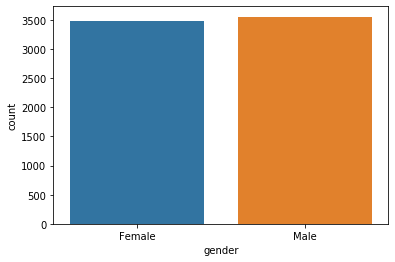

In [12]:
sns.countplot(x= 'gender',data = churn_data)
plt.show() # Count of Male and Female is almost same

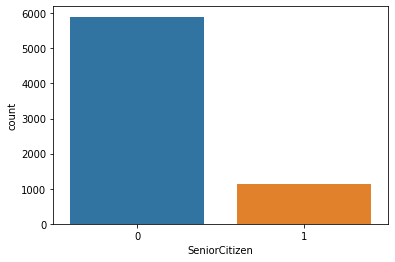

In [13]:
sns.countplot(x="SeniorCitizen",data=churn_data)
plt.show() # from this graph we can say that ,in dataset there are 6 times less senior citizen

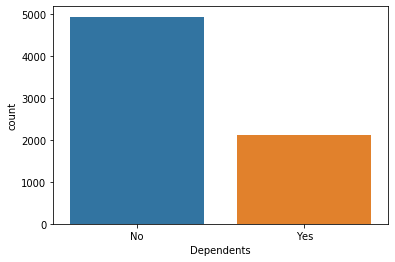

In [14]:
sns.countplot(x='Dependents',data=churn_data)
plt.show() # there are two times more people with no dependents

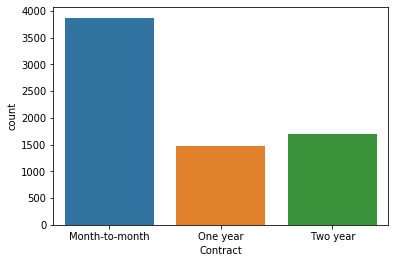

In [15]:
sns.countplot(x='Contract',data= churn_data)
plt.show() # most of the customer using monthly contract

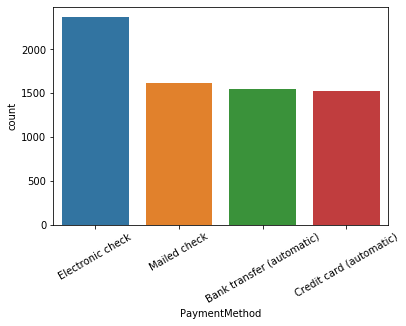

In [21]:
y=sns.countplot(x="PaymentMethod",data=churn_data)
plt.setp(y.get_xticklabels(),rotation=30)[1] # customers are using electronic check for payment

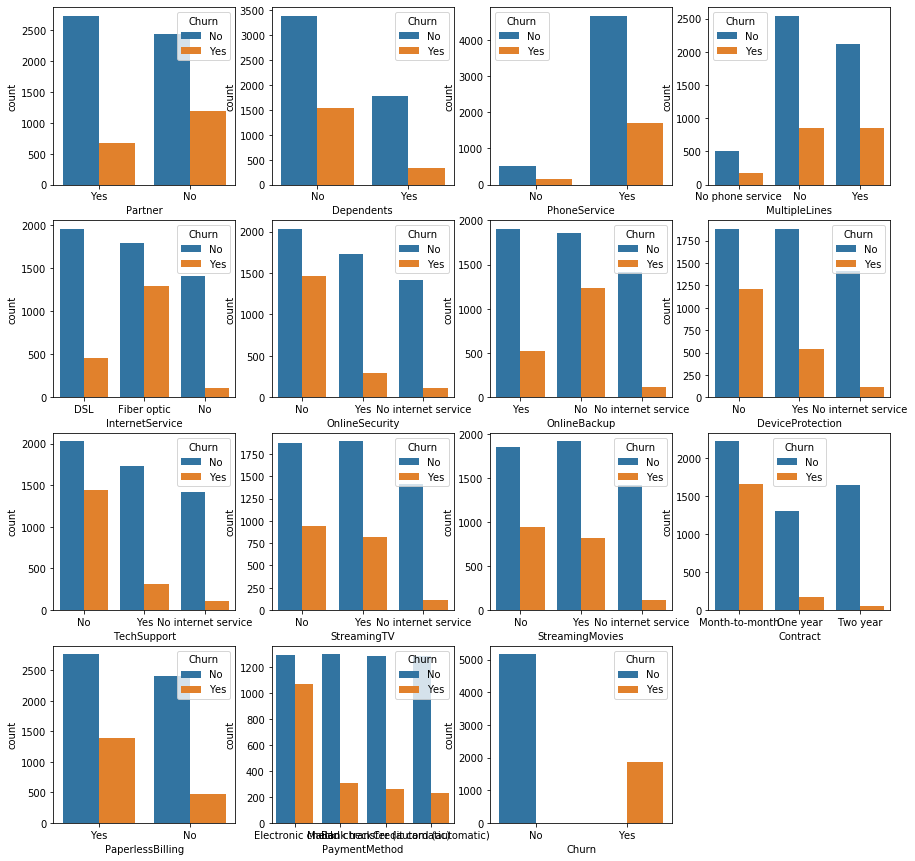

In [28]:
# Plot all categorical varaibles with Churn

plt.figure(figsize=(15,15))

for k in range (1,len(categorical_variables.columns)) :
    plt.subplot(4,4,k)
    sns.countplot(categorical_variables.columns[k],data=churn_data,hue='Churn')

From this graph it is observed that :
Internet Service with fiber optic,customer with no online backup,no device protection,no technical support and those who have monthly contract are more likely to churn.

In [105]:
# Converting categorical variables to numeric 

numeric_cat = categorical_variables.apply(lambda x : pd.factorize(x)[0])
numeric_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1


Here we can see that magnitude is different for tenure,MonthlyCharges,TotalCharges.So we will do scaling for these varaibles.

In [72]:
# Scaling Data
from sklearn import preprocessing  

In [73]:
scaler= preprocessing.StandardScaler()

In [74]:
scale_variables = scaler.fit_transform(numeric_variables.iloc[:,1:])

In [75]:
scale_varaibles =pd.DataFrame(scale_variables,columns=['tenure','MonthlyCharges','TotalCharges'])
scale_varaibles.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [76]:
# Merging scaled variables and SeniorCitizen
scale_varaibles = pd.concat([numeric_variables['SeniorCitizen'],scale_varaibles],axis=1)
scale_varaibles.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,-1.277445,-1.160323,-0.994242
1,0,0.066327,-0.259629,-0.173244
2,0,-1.236724,-0.362660,-0.959674
3,0,0.514251,-0.746535,-0.194766
4,0,-1.236724,0.197365,-0.940470


In [79]:
# Merging all varaibles to one dataframe

final_df = pd.concat([scale_varaibles,numeric_cat],axis=1)
final_df.shape

(7043, 20)

In [80]:
final_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,-1.277445,-1.160323,-0.994242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.066327,-0.259629,-0.173244,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,0,-1.236724,-0.362660,-0.959674,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,0,0.514251,-0.746535,-0.194766,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,-1.236724,0.197365,-0.940470,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1


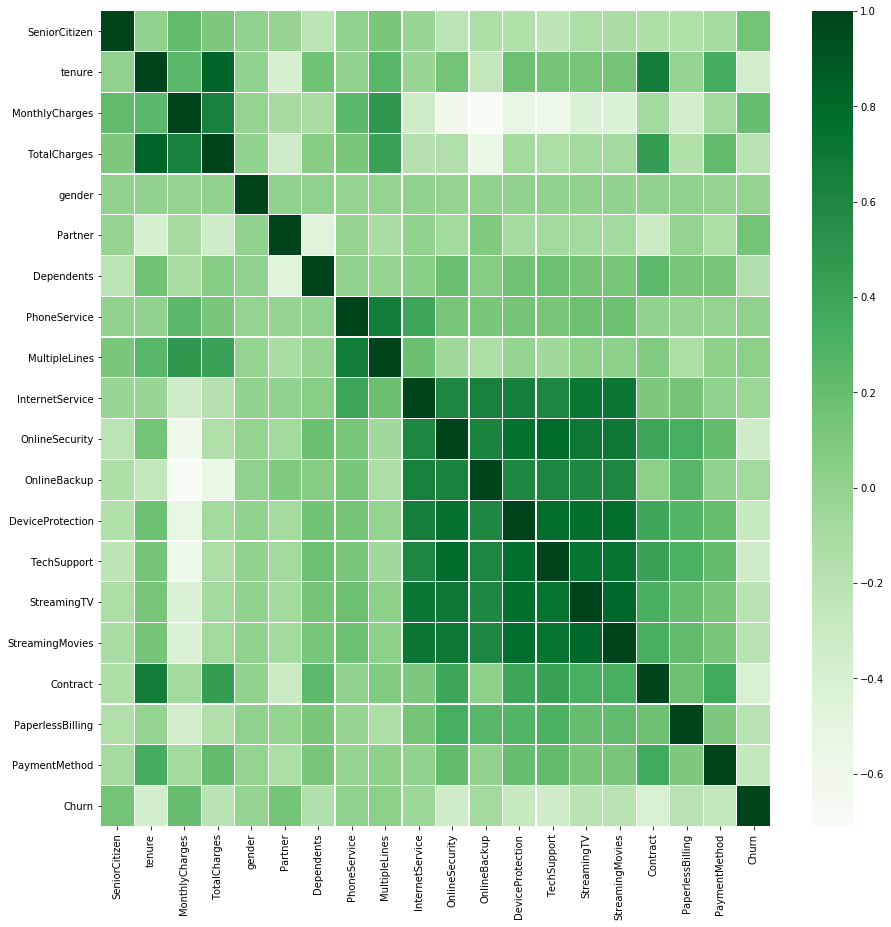

In [109]:
# Feature Selection Using Pearson Correlation

plt.figure(figsize=(15,15))
cor = final_df.corr()
sns.heatmap(cor,xticklabels=cor.columns, yticklabels=cor.columns,linewidths=.2,cmap='Greens')
plt.show()

Churn is correlated with below varaibles :

SeniorCitizen,MonthlyCharges,Partner,MultipleLines,OnlineBackup,PhoneService

### Implement Machine Learning Models

In [112]:
X = final_df.iloc[:,0:19]
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,-1.277445,-1.160323,-0.994242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.066327,-0.259629,-0.173244,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1
2,0,-1.236724,-0.362660,-0.959674,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1
3,0,0.514251,-0.746535,-0.194766,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2
4,0,-1.236724,0.197365,-0.940470,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0


In [117]:
Y = final_df['Churn']

## Random Forest

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score

In [132]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle=False)

In [133]:
X_train.shape

(4930, 19)

In [129]:
X_test.shape

(2113, 19)

In [134]:
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=4,
                                       oob_score=True,
                                       warm_start=True,
                                       criterion='entropy')

In [135]:
rf_model= rf_classifier.fit(X_train,Y_train)

In [136]:
predict_rf = rf_model.predict(X_test)

In [171]:
feature_imp = pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

TotalCharges        0.183539
MonthlyCharges      0.175228
tenure              0.155776
Contract            0.079747
PaymentMethod       0.056613
OnlineSecurity      0.042855
TechSupport         0.042470
gender              0.028488
OnlineBackup        0.026925
MultipleLines       0.024889
PaperlessBilling    0.024424
StreamingMovies     0.023738
Partner             0.023438
DeviceProtection    0.023357
InternetService     0.022726
StreamingTV         0.020692
Dependents          0.020036
SeniorCitizen       0.019988
PhoneService        0.005071
dtype: float64

In [173]:
feature_varaible= rf_model.feature_importances_

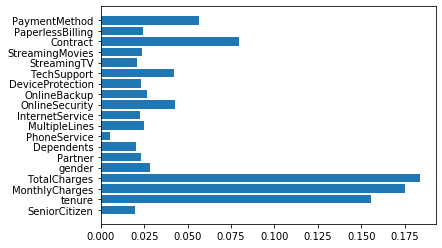

In [176]:
plt.barh(X_train.columns, feature_varaible)
plt.show()

## Model after feature Selection

In [177]:
X_train_feature = X_train[['TotalCharges','MonthlyCharges','tenure','Contract','PaymentMethod']]

In [178]:
X_test_feature = X_test[['TotalCharges','MonthlyCharges','tenure','Contract','PaymentMethod']]

In [180]:
rf_feature = RandomForestClassifier(n_estimators=100,
                                       n_jobs=4,
                                       oob_score=True,
                                       warm_start=True,
                                       criterion='entropy')

In [182]:
rf_feature_model= rf_feature.fit(X_train_feature,Y_train)

In [183]:
predict_rf_feature = rf_feature_model.predict(X_test_feature)

## Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logistic_classifier = LogisticRegression()

In [145]:
logistic_classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
logistic_predict = logistic_classifier.predict_proba(X_test)

## Model after feature selection

In [186]:
logistic_classifier.fit(X_train_feature,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
logistic_feature_predict = logistic_classifier.predict_proba(X_test_feature)

### Random forest Model Evaluation with all feature

In [139]:
rf_confusionMatrix = confusion_matrix(Y_test,predict_rf)
rf_confusionMatrix

array([[1391,  142],
       [ 300,  280]], dtype=int64)

In [141]:
rf_accuracy = metrics.accuracy_score(Y_test,predict_rf)
rf_accuracy

0.7908187411263606

## Random forest Model Evaluation with  feature selection

In [184]:
rf_feature_confusionMatrix = confusion_matrix(Y_test,predict_rf_feature)

In [185]:
rf_feature_accuracy = metrics.accuracy_score(Y_test,predict_rf_feature)
rf_feature_accuracy

0.7756743965925225

## Logistic Regression Model Evaluation with all feature

In [154]:
logistic_accuracy = roc_auc_score(y_true=Y_test,y_score=logistic_predict[:,1])
logistic_accuracy

0.8391158872618485

## Logistic Regression Model Evaluation with feature selection

In [188]:
logistic_feature_accuracy = roc_auc_score(y_true=Y_test,y_score=logistic_feature_predict[:,1])
logistic_feature_accuracy

0.8237898418696719

### Final Conclusions

After implementing Random Forest and Logistic regression for this business problem, it is observed that Logfistic Regression is giving good accuracy i.e. 83.91
Models are implemented with feature selection as well as with all features but models are performing well with all features. So we can go ahead with Logistic Regression model with all feature.
